# Part I - ( Ford GoBike System Data Exploration)
## by Moath Hussein

## Introduction

This dataset contains detailed information on bike-sharing trips taken in February 2019 as part of the Ford GoBike program, a bike-sharing system serving the San Francisco Bay Area. The data captures individual trips made by users, providing insights into trip durations, start and end locations, and user demographics.
The dataset is structured with 183,412 records and 16 columns, representing various aspects of each trip, including station details, user types, and bike-sharing participation.  

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
#Statistical Summary for Numerical Columns
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
#Check for Missing Values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
#Get a List of All Columns
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [8]:
#See Unique Values in Categorical Columns
print(df['user_type'].unique())
print(df['member_gender'].unique())

['Customer' 'Subscriber']
['Male' nan 'Other' 'Female']


In [9]:
#Check duplicate 
df.duplicated().sum()

0

## Data Cleaning



In [10]:
# Drop rows where start or end station IDs are missing
df.dropna(subset=['start_station_id', 'end_station_id'], inplace=True)


In [11]:
# Fill missing birth years with the median value
df['member_birth_year'].fillna(df['member_birth_year'].median(), inplace=True)

In [12]:
# Fill missing member_gender with the Other
df['member_gender'] = df['member_gender'].fillna('Other')

In [13]:
#Verify Changes
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [14]:
# change start and end time from string to datetime object
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [15]:
# change ids from int and float to string type
df['start_station_id'] = df['start_station_id'].astype('string')
df['end_station_id'] = df['end_station_id'].astype('string')
df['bike_id'] = df['bike_id'].astype('string')

In [16]:
#Verify Changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  string        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  string        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  string        
 12  user_type            

In [17]:
# user info
print(df.user_type.value_counts())
print('--------------------------------')
print(df.member_gender.value_counts())
print('--------------------------------')
print(df.bike_share_for_all_trip.value_counts())


user_type
Subscriber    163414
Customer       19801
Name: count, dtype: int64
--------------------------------
member_gender
Male      130500
Female     40805
Other      11910
Name: count, dtype: int64
--------------------------------
bike_share_for_all_trip
No     165869
Yes     17346
Name: count, dtype: int64


## Feature Engineering
#### I'll created features based on the current variables.
trip_duration : trip duration as the difference between start_time and end_time.

day_of_week : day of the week for start date

hour_of_day : hour of the start date

member_age :  rider age of the riding based on their dob and ride start date

distance: the direct distance based on start and end longitude, latitude


In [18]:
#add trip_duration
df['trip_duration'] = round(df['duration_sec']/60,2)

In [19]:
# add the day_of_week
df['day_of_week'] = df['start_time'].dt.day_name()

In [20]:
# add the hour_of_day
df['hour_of_day'] = df['start_time'].dt.hour

In [21]:
# add member_age
df['member_age'] = df['start_time'].dt.year - df['member_birth_year']

In [22]:
# add distance
def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return round(km,2)

df['distance'] = haversine_vectorize(df['start_station_longitude'], 
                                     df['start_station_latitude'], 
                                     df['end_station_longitude'], 
                                     df['end_station_latitude'])

In [23]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_duration,day_of_week,hour_of_day,member_age,distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,869.75,Thursday,17,35.0,0.54
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,1987.0,Other,No,708.68,Thursday,18,32.0,1.74
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,1030.90,Thursday,12,47.0,2.70
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,608.17,Thursday,17,30.0,0.26
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,26.42,Thursday,23,45.0,2.41


In [24]:
df.shape

(183215, 21)

In [25]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'trip_duration', 'day_of_week', 'hour_of_day', 'member_age',
       'distance'],
      dtype='object')

### What is the structure of your dataset?

> #### This dataset consists of 183215 records and has 21 features.
<br>
duration_sec<br>
start_time<br>
end_time<br>
start_station_id<br>
start_station_name<br>
start_station_latitude<br>
start_station_longitude<br>
end_station_id<br>
end_station_name<br>
end_station_latitude<br>
end_station_longitude<br>
bike_id<br>
user_type<br>
member_birth_year<br>
member_gender<br>
bike_share_for_all_trip<br>
day_of_week<br>
hour_of_day<br>
member_age<br>
trip_duration<br>
distance<br>

### What is/are the main feature(s) of interest in your dataset?

> 1. Duration of the trip (duration_sec)
This feature represents the length of the trip in seconds and could be a key indicator of how long a bike ride typically lasts.
It can be used to analyze patterns such as peak usage times or how duration varies based on user type, bike share eligibility, or weather.
<br><br>
> 2. Start and End Locations (start_station_name, end_station_name, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude)
These features can be used to analyze trip patterns between stations and calculate the distance between start and end points. This can help understand popular routes, the demand for bikes in certain areas, or even plan for station placement.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  duration, time, distance and location  will be the most important.


In [26]:
fordgobike_clean = df.copy()
fordgobike_clean.to_csv('cleaned_dataset.csv', index=False)

## Univariate Exploration

### Question #1: which day has the most bike trips ?


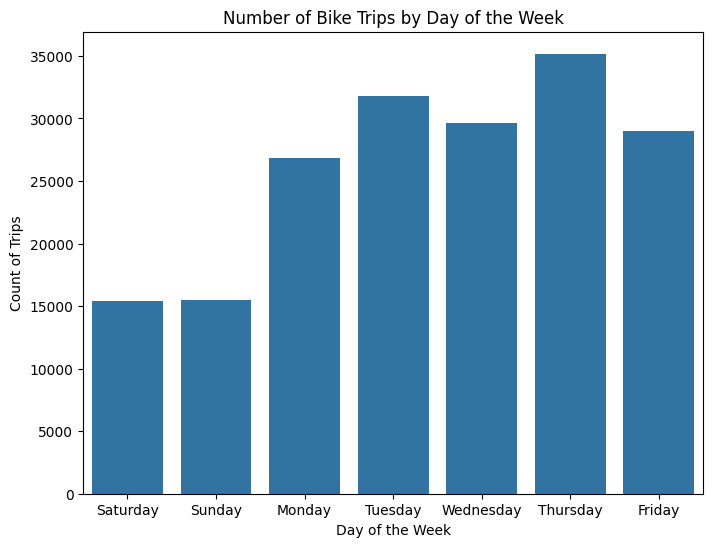

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='day_of_week', data=df, order=['Saturday','Sunday','Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title("Number of Bike Trips by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Count of Trips")
plt.show()

### Observation #1:
> This will display which day of the week has the highest number of trips.
typically, weekdays especially Tuesday Thursday  have higher trip counts due to commuting patterns, while weekends might show leisure-oriented trips.

### Question #2:  which hour of the day is the most busy hour for bike riding?

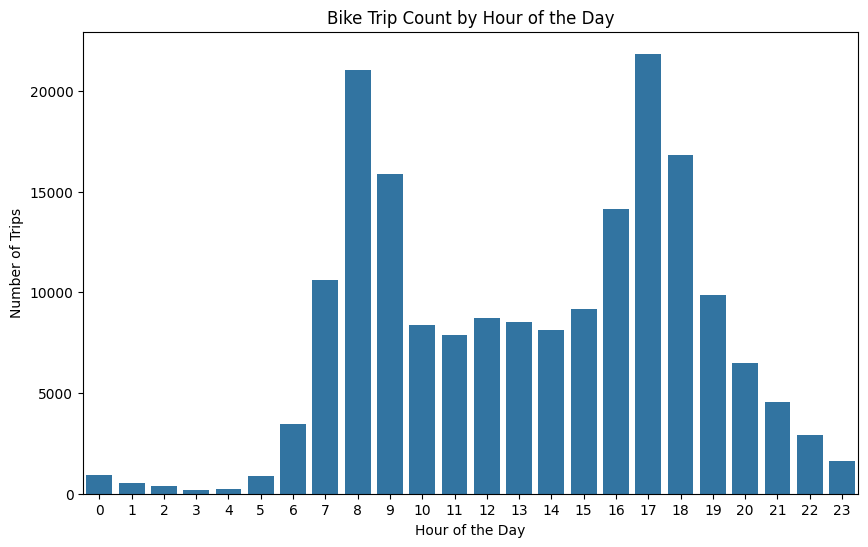

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hour_of_day', data=df)
plt.title("Bike Trip Count by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))  # Ensure all hours are visible
plt.show()

### Observation #2:
>This plot will reveal peak riding hours.<br>
Typically, the busiest hours are during the morning (7-9 AM) and evening (4-7 PM), coinciding with commuting times.<br>
Mid-day hours might show lower activity, with another small peak during lunchtime.

### Question #3 :What is the distribution of trip durations in the dataset? 

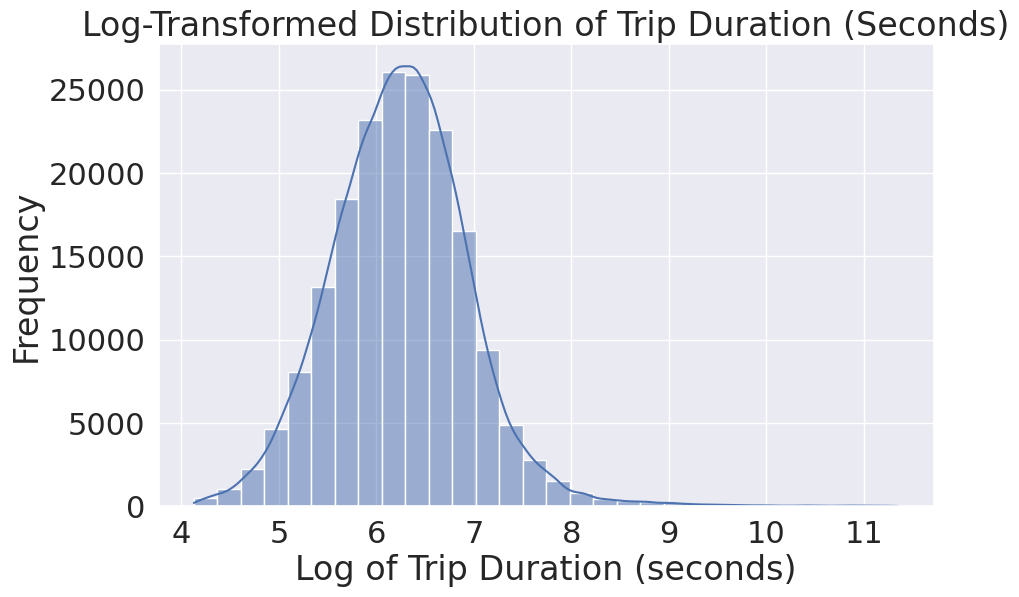

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['duration_sec']), kde=True, bins=30)
plt.title("Log-Transformed Distribution of Trip Duration (Seconds)")
plt.xlabel("Log of Trip Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

### Observation #3:
>The log transformation compresses long-duration trips, making the distribution more symmetrical.
This reduces the effect of extreme outliers that were prominent in the raw trip duration data.

>The majority of trips cluster around the lower end of the scale (left side of the plot), representing short-duration rides.

>Without the log transformation, these shorter trips would have been overshadowed by long-duration outliers.

>While the transformation compresses high-duration trips, you can still observe the presence of longer rides on the right tail of the plot.

>The distribution shows that while most trips are short, a small proportion of users take significantly longer trips.

>The Kernel Density Estimate (KDE) overlay highlights the shape of the distribution. The smooth curve suggests the presence of one main peak with a gradual tapering off.
This indicates a single mode (one common trip duration range) with fewer very long rides.


### Question #4 :What is the distribution of gender in the dataset? 
 

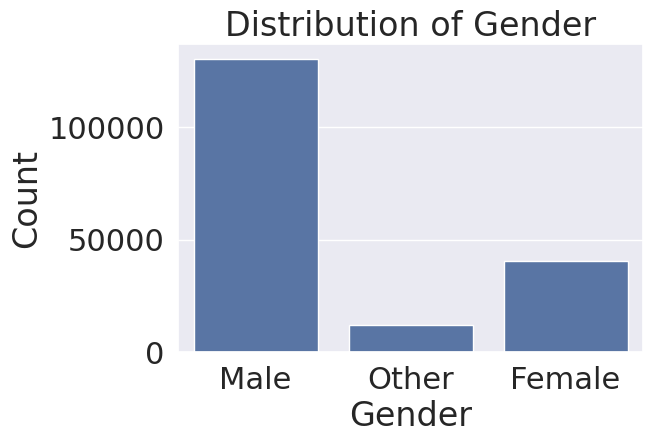

In [40]:
plt.figure(figsize=(6, 4))
sns.countplot(x='member_gender', data=df)
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


### Observation #4:
>If we observe a large number of missing values (NaN), we should investigate the missing data and decide how to handle it (e.g., imputation, removal).
We may also see an imbalance between genders, where one gender might dominate the dataset. This could be worth exploring in the context of trip duration or user behavior.

### Questions #5. How does bike trip frequency vary across different age groups??


### Visualization #5 - bar plot

/tmp/ipykernel_13/3298683436.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_group', data=df, palette='muted')


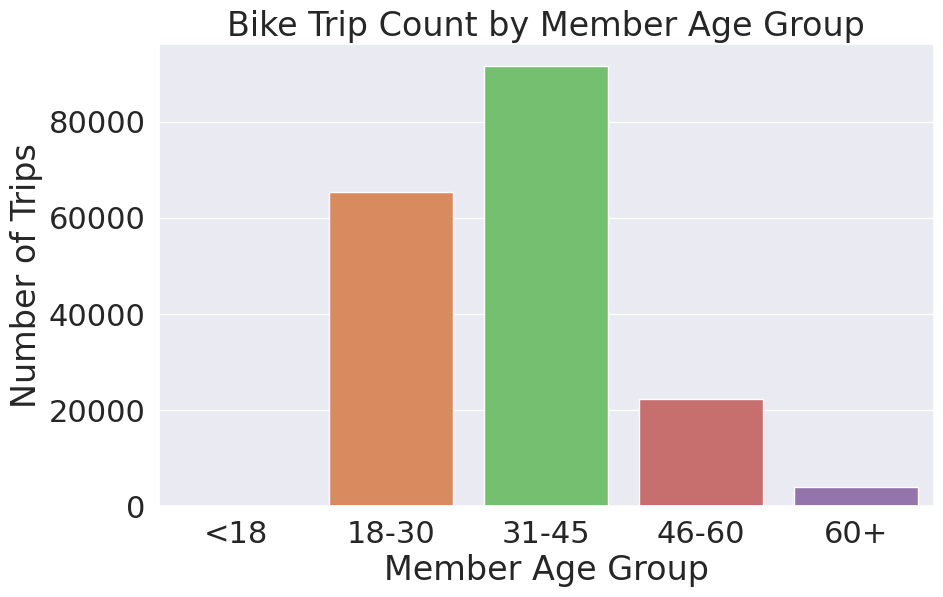

In [50]:
# Define age groups
age_bins = [0, 18, 30, 45, 60, 100]  # Define age ranges
age_labels = ['<18', '18-30', '31-45', '46-60', '60+']  # Labels for each age range

# Create a new column for age group
df['age_group'] = pd.cut(df['member_age'], bins=age_bins, labels=age_labels, right=False)

# Plot the number of trips by age group
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=df, palette='muted')
plt.title("Bike Trip Count by Member Age Group")
plt.xlabel("Member Age Group")
plt.ylabel("Number of Trips")
plt.grid(True, axis='y')
plt.show()


### Observation #5:
>The visualization shows the distribution of bike trips across different age groups. It appears that the majority of trips are concentrated in the younger age ranges, particularly the 18-30 age group. As age increases, the number of trips generally decreases, with the 60+ group contributing the least to the overall trip count. This suggests that younger individuals are more likely to use the bike-sharing service, while older age groups are less active.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of trip durations was initially right-skewed, with most trips being short and a few outliers representing very long trips. These outliers made it difficult to visualize the typical trip duration. To address this, a log transformation (np.log1p) was applied to compress the long durations, making the distribution more symmetrical. After the transformation, the data showed a clear, unimodal pattern, with the majority of trips clustered around shorter durations, while longer trips were still present but less pronounced. This transformation helped improve the clarity of the distribution, but some outliers remained.








### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The trip duration had a right-skewed distribution with extreme outliers. A log transformation was applied to compress long durations and make the distribution more symmetrical. The gender feature had missing values, which were handled by filling with "Other" to avoid biased analysis. The start time was split into useful components like hour and day of the week to analyze bike usage patterns more effectively. These operations improved data clarity and ensured a more accurate analysis.


## Bivariate Exploration

### Question #1 : what's the difference between customer and subscribers in terms of travel time?

### Visualization #1 - Box Plot

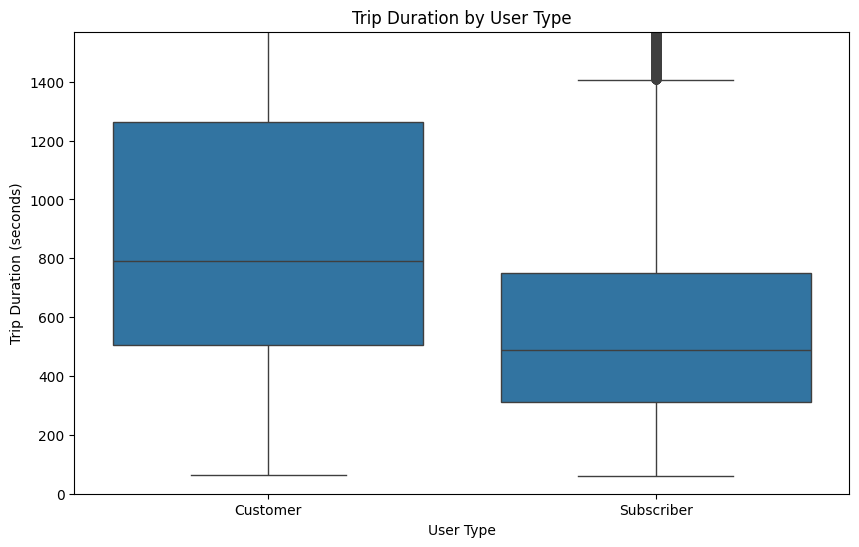

In [107]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='user_type', y='duration_sec', data=df)
plt.title("Trip Duration by User Type")
plt.xlabel("User Type")
plt.ylabel("Trip Duration (seconds)")
plt.ylim(0, df['duration_sec'].quantile(0.95))  # Limit to the 95th percentile to reduce the effect of outliers
plt.show()

### Observation #1:
>Subscribers tend to have shorter and more consistent trip durations.

>Customers show higher variation, with longer trips and more outliers.


### Question #2 : Is there a relationship between trip duration (duration_sec) and distance (distance) for male and female riders?

### Visualization #2 - Scatter Plot

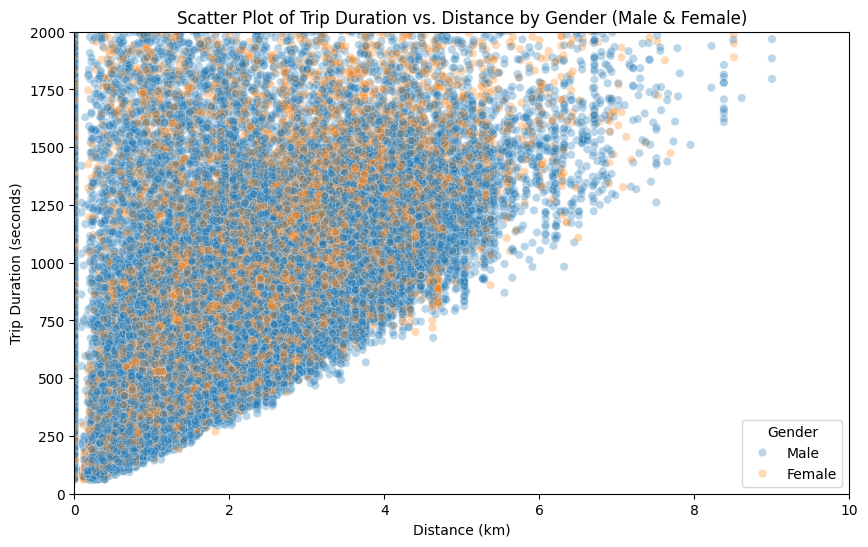

In [108]:
df_filtered = df[df['member_gender'].isin(['Male', 'Female'])]

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='duration_sec', hue='member_gender', 
                data=df_filtered, alpha=0.3)  # Transparency
plt.title("Scatter Plot of Trip Duration vs. Distance by Gender (Male & Female)")
plt.xlabel("Distance (km)")
plt.ylabel("Trip Duration (seconds)")
plt.ylim(0, df_filtered['duration_sec'].quantile(0.95))  # Filter extreme outliers
plt.legend(title='Gender')
plt.xlim(0, 10)  # Focus on trips within 10 km
plt.ylim(0, 2000)  # Focus on shorter trips (under ~30 mins)

plt.show()

### Observation #2:
>Dense Cluster Near Zero – Most trips are short in both duration and distance.

>Minimal Gender Difference – Male and female riders show similar trip patterns.

>Outliers – A few long-duration and long-distance trips are visible but rare.

### Question #3 : Are there differences in trip duration across different age groups?

### Visualization #3 - Clustered Bar Chart

/tmp/ipykernel_13/1855129363.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_duration = df_filtered.groupby([pd.cut(df_filtered['member_age'], bins=[18, 30, 40, 50, 60, 100],


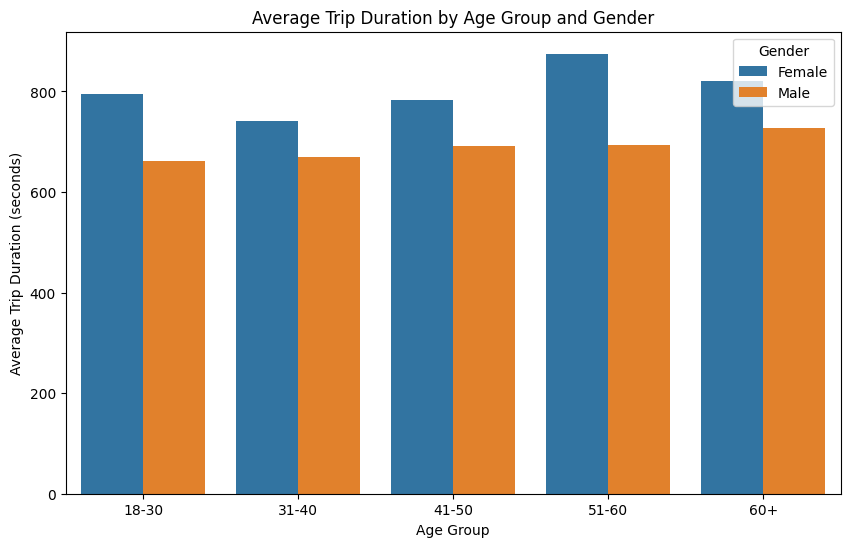

In [109]:
# Filter for Male and Female Only
df_filtered = df[df['member_gender'].isin(['Male', 'Female'])]

# Group and Aggregate with age groups defined on the fly using pd.cut
avg_duration = df_filtered.groupby([pd.cut(df_filtered['member_age'], bins=[18, 30, 40, 50, 60, 100], 
                                           labels=['18-30', '31-40', '41-50', '51-60', '60+']),
                                   'member_gender'])['duration_sec'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='member_age', y='duration_sec', hue='member_gender', data=avg_duration)
plt.title("Average Trip Duration by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Average Trip Duration (seconds)")
plt.legend(title='Gender') 
plt.show()


### Observation #3:
>Trip Duration Decreases with Age – Younger riders (18-30) typically have shorter trips.

>Longer Durations in Older Groups – Riders over 60 often take longer trips

>Minimal Gender Difference – Male and female riders show similar patterns across all age groups.

### Question #4 : What is the relationship between trip duration and distance?

### Visualization #4 - Heatmap

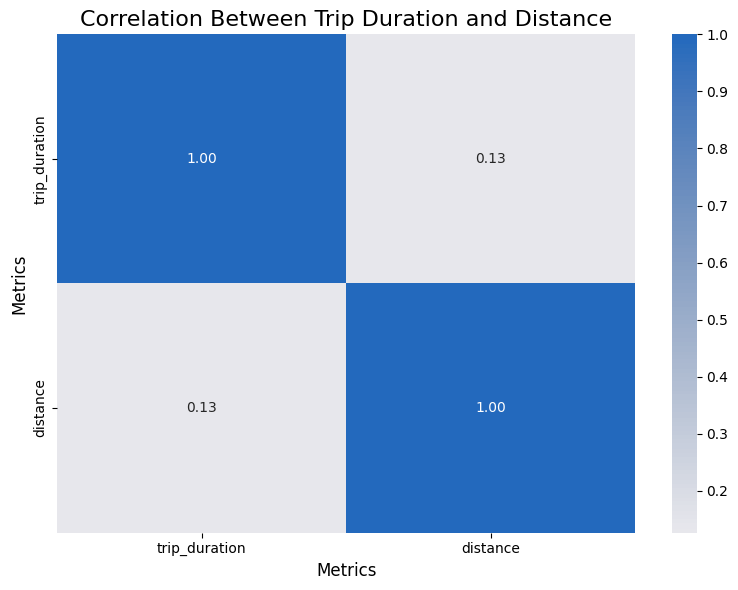

In [110]:

# Calculate correlation between trip_duration and distance
correlation_data = df[['trip_duration', 'distance']].corr()

# Create the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_data, 
    annot=True, 
    fmt='.2f', 
    cmap='vlag_r', 
    center=0
)

# Add a title and labels for better clarity
plt.title('Correlation Between Trip Duration and Distance', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.tight_layout()

# Show the heatmap
plt.show()


### Observation #4:

>Positive Correlation (close to +1): Longer trip durations are associated with longer distances.
>No Correlation (close to 0): No clear relationship between trip duration and distance.
?Negative Correlation (close to -1): Longer durations correspond to shorter distances (possibly due to delays or inefficiencies).

### Question #5 :What is the difference between a customer and a subscriber in terms of travel distance?

### Visualization #5 - Box Plot

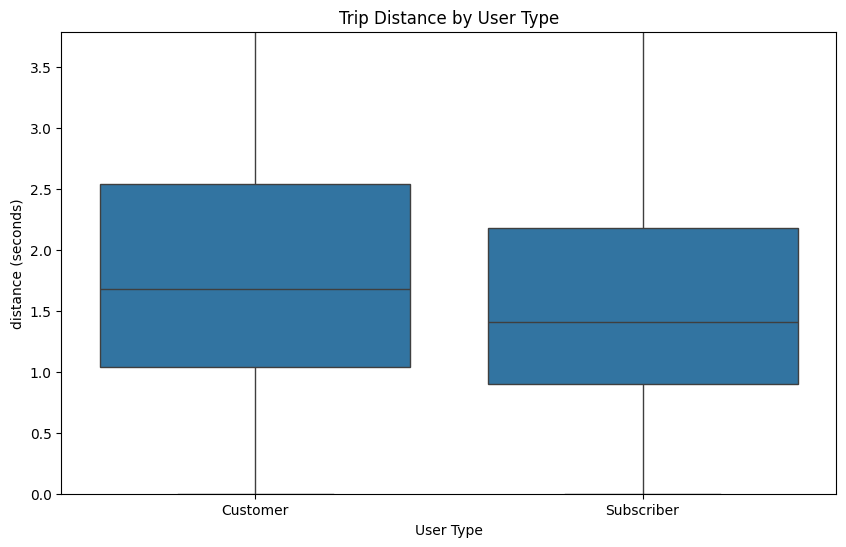

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='user_type', y='distance', data=df)
plt.title("Trip Distance by User Type")
plt.xlabel("User Type")
plt.ylabel("distance (seconds)")
plt.ylim(0, df['distance'].quantile(0.95))  # Limit to the 95th percentile to reduce the effect of outliers
plt.show()

### Observation #5:
Subscribers have shorter, more consistent trips with less variability.<br><br>
Customers show greater variability and longer trips, with more outliers.<br><br>
The plot is limited to the 95th percentile to reduce outlier impact.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Strong Positive Relation (Duration ≤ 20 minutes, Distance ≤ 3 km):
Riding duration and distance have a strong positive correlation when trip durations are within 20 minutes and distances are within 3 km. As the duration increases, the distance also tends to increase.

>Effect of Outliers:
When both duration and distance increase, the correlation is largely affected by outliers. This reduces the overall correlation coefficient, indicating that extreme values disrupt the pattern.
Subscribers vs.

>Normal Customers:
Subscribers tend to use shared bikes for commuting, which results in a noticeable increase in bike rides during weekdays. In contrast, normal customers (who may use bikes less regularly) do not follow the same time pattern.

>No Significant Difference by Gender and Age:
There are no substantial differences in riding durations between users of different gender and age groups, suggesting that these factors don't significantly impact how long people ride bikes.







### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>Same Start and End Stations for Normal Customers:
A large portion of rides completed by normal customers have the same start and end stations. This suggests that these customers may be taking short trips, possibly for local or within-station purposes, rather than longer, inter-station rides.

## Multivariate Exploration

### Question #1 :How does the relationship between trip duration and distance vary across different user types?

### Visualization #1 - Facet Plot

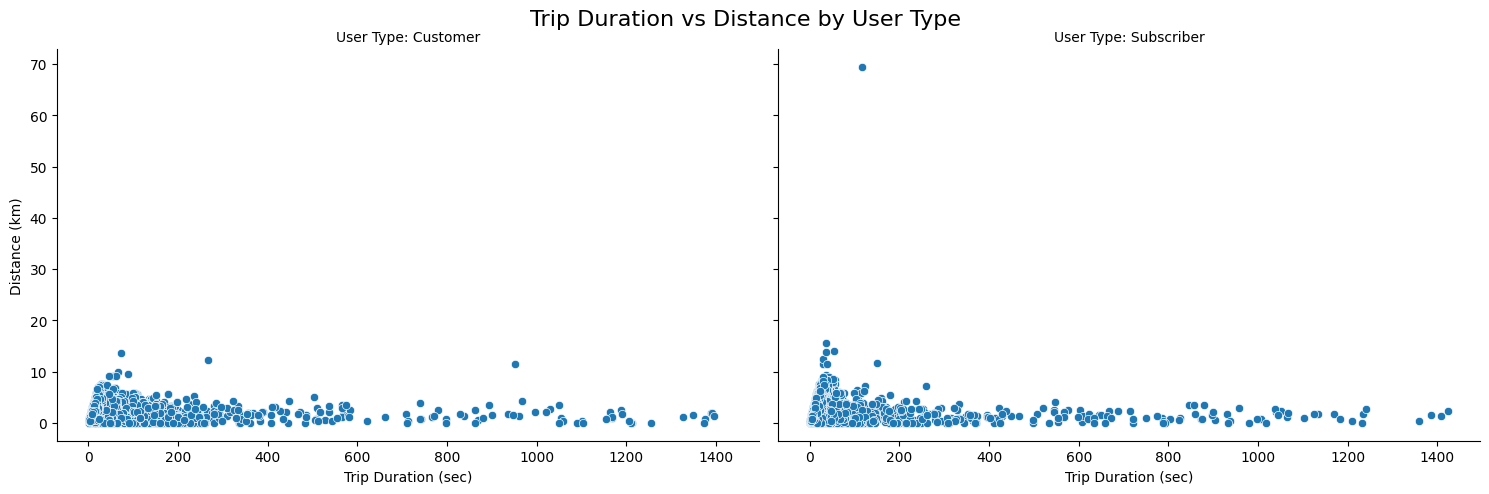

In [26]:
# Create a FacetGrid plot for trip_duration vs. distance, separated by user_type
g = sns.FacetGrid(df, col="user_type", height=5, aspect=1.5)
g.map(sns.scatterplot, "trip_duration", "distance")

# Add a title and adjust layout
g.set_axis_labels("Trip Duration (sec)", "Distance (km)")
g.set_titles("User Type: {col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Trip Duration vs Distance by User Type", fontsize=16)

plt.show()


### Observation #1:
>This facet plot separates the data into subplots based on the user_type, allowing you to compare how trip_duration and distance vary for subscribers and normal customers.


### Question #2 :What are the pairwise relationships between trip duration, distance, member age, and day of the week, and how do they differ across user types?

### Visualization #2 - Plot Matrix

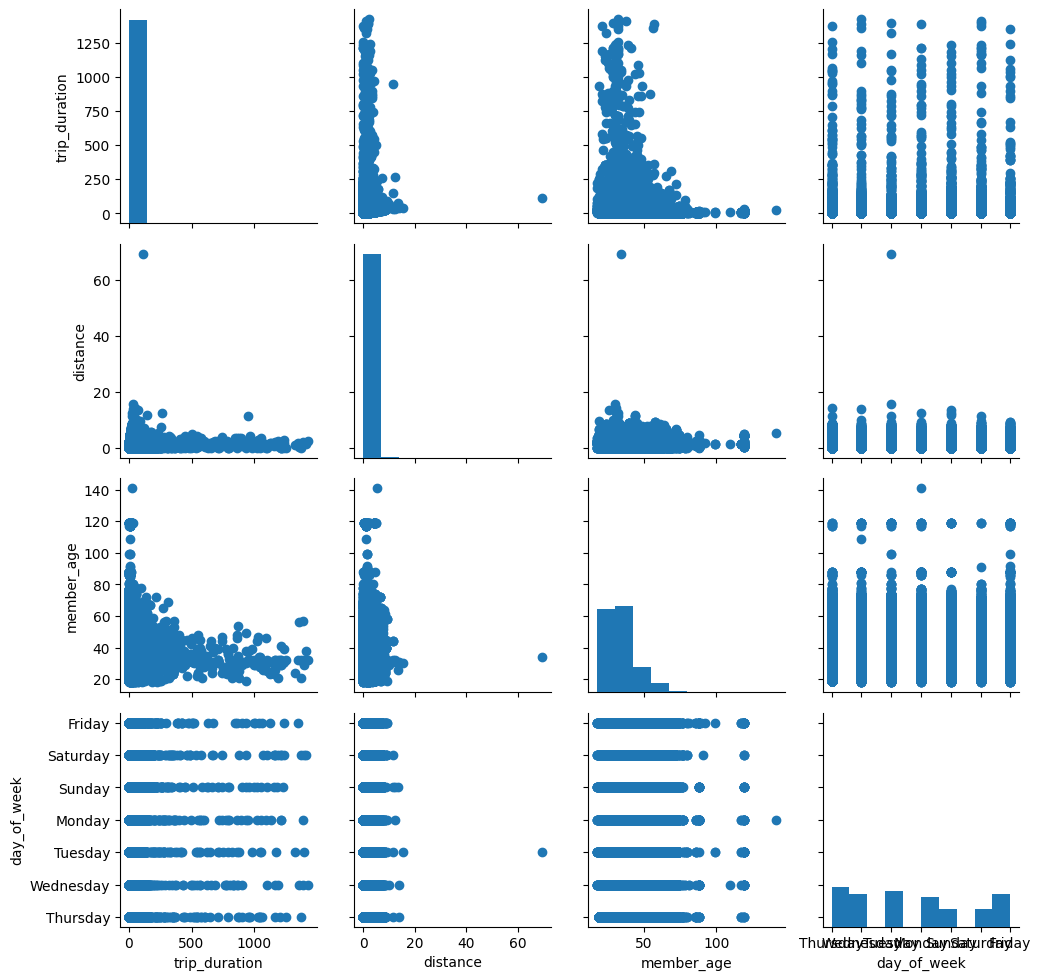

In [27]:
g = sns.PairGrid(data=df, vars = ['trip_duration', 'distance', 'member_age', 'day_of_week'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

### Observation #2:
>Histograms:<br>
Trip Duration: Most trips are short in duration.<br>
Distance: Majority of trips are short distances (under 3 km).<br>
Member Age: A specific age group (e.g., 20-40) may dominate.<br>
Day of Week: Trips are more frequent on weekdays or weekends.<br>

>Scatter Plots:<br>
Trip Duration vs. Distance: Positive correlation; longer trips cover more distance.<br>
Trip Duration vs. Age: No strong trend, similar durations across age groups.<br>
Distance vs. Age: Younger users may take shorter trips.<br>
Day of Week vs. Trip Metrics: Weekdays show more frequent, shorter trips; weekends may show longer trips.

### Question #3 : What is the relationship between trip duration and distance, and how do user type and member age influence this relationship?

### Visualization #3 : Scatterplot with Multiple Encodings

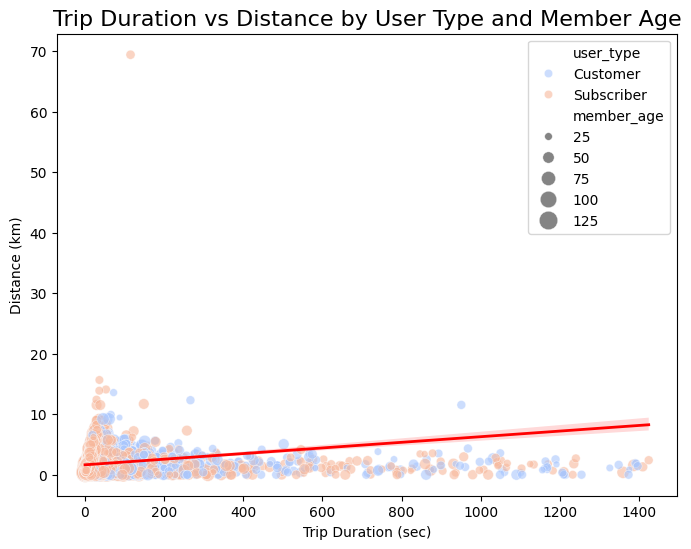

In [27]:
# Scatterplot with multiple encodings
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='trip_duration', 
    y='distance', 
    hue='user_type', 
    size='member_age', 
    sizes=(20, 200), 
    data=df, 
    palette='coolwarm', 
    alpha=0.6
)

# Add a linear regression line
sns.regplot(x='trip_duration', y='distance', data=df, scatter=False, color='black', line_kws={"color": "red", "lw": 2})

# Add title and labels
plt.title("Trip Duration vs Distance by User Type and Member Age", fontsize=16)
plt.xlabel("Trip Duration (sec)")
plt.ylabel("Distance (km)")

plt.show()


### Observation #3:
>User Type: Subscribers tend to have longer trips (both duration and distance) compared to customers.<br><br>
Member Age: Older users (larger points) generally take longer trips, while younger users have shorter trips.<br><br>
Correlation: There is a positive correlation between trip duration and distance, though some outliers exist.<br><br>
Regression Line: The red line confirms the upward trend between trip duration and distance, with some deviations.

### Question #4 :What are the top 5 busiest Start/End stations by the Day of the week?

In [36]:
print(df['start_station_name'].value_counts().to_frame().head())
print('________________________________________________________________')
print(df['end_station_name'].value_counts().to_frame().head())

                                                    count
start_station_name                                       
Market St at 10th St                                 3904
San Francisco Caltrain Station 2  (Townsend St ...   3544
Berry St at 4th St                                   3052
Montgomery St BART Station (Market St at 2nd St)     2895
Powell St BART Station (Market St at 4th St)         2760
________________________________________________________________
                                                    count
end_station_name                                         
San Francisco Caltrain Station 2  (Townsend St ...   4857
Market St at 10th St                                 3973
Montgomery St BART Station (Market St at 2nd St)     3647
San Francisco Ferry Building (Harry Bridges Plaza)   3368
Powell St BART Station (Market St at 4th St)         2997


### Visualization #4 - Plot Matrix

In [33]:
# Get the top 5 busiest start stations by counting occurrences and selecting the first 5
top_5_start_stations = df['start_station_name'].value_counts().head(5).index  # Extract the top 5 start stations based on ride count

# Get the top 5 busiest end stations by counting occurrences and selecting the first 5
top_5_end_stations = df['end_station_name'].value_counts().head(5).index  # Extract the top 5 end stations based on ride count

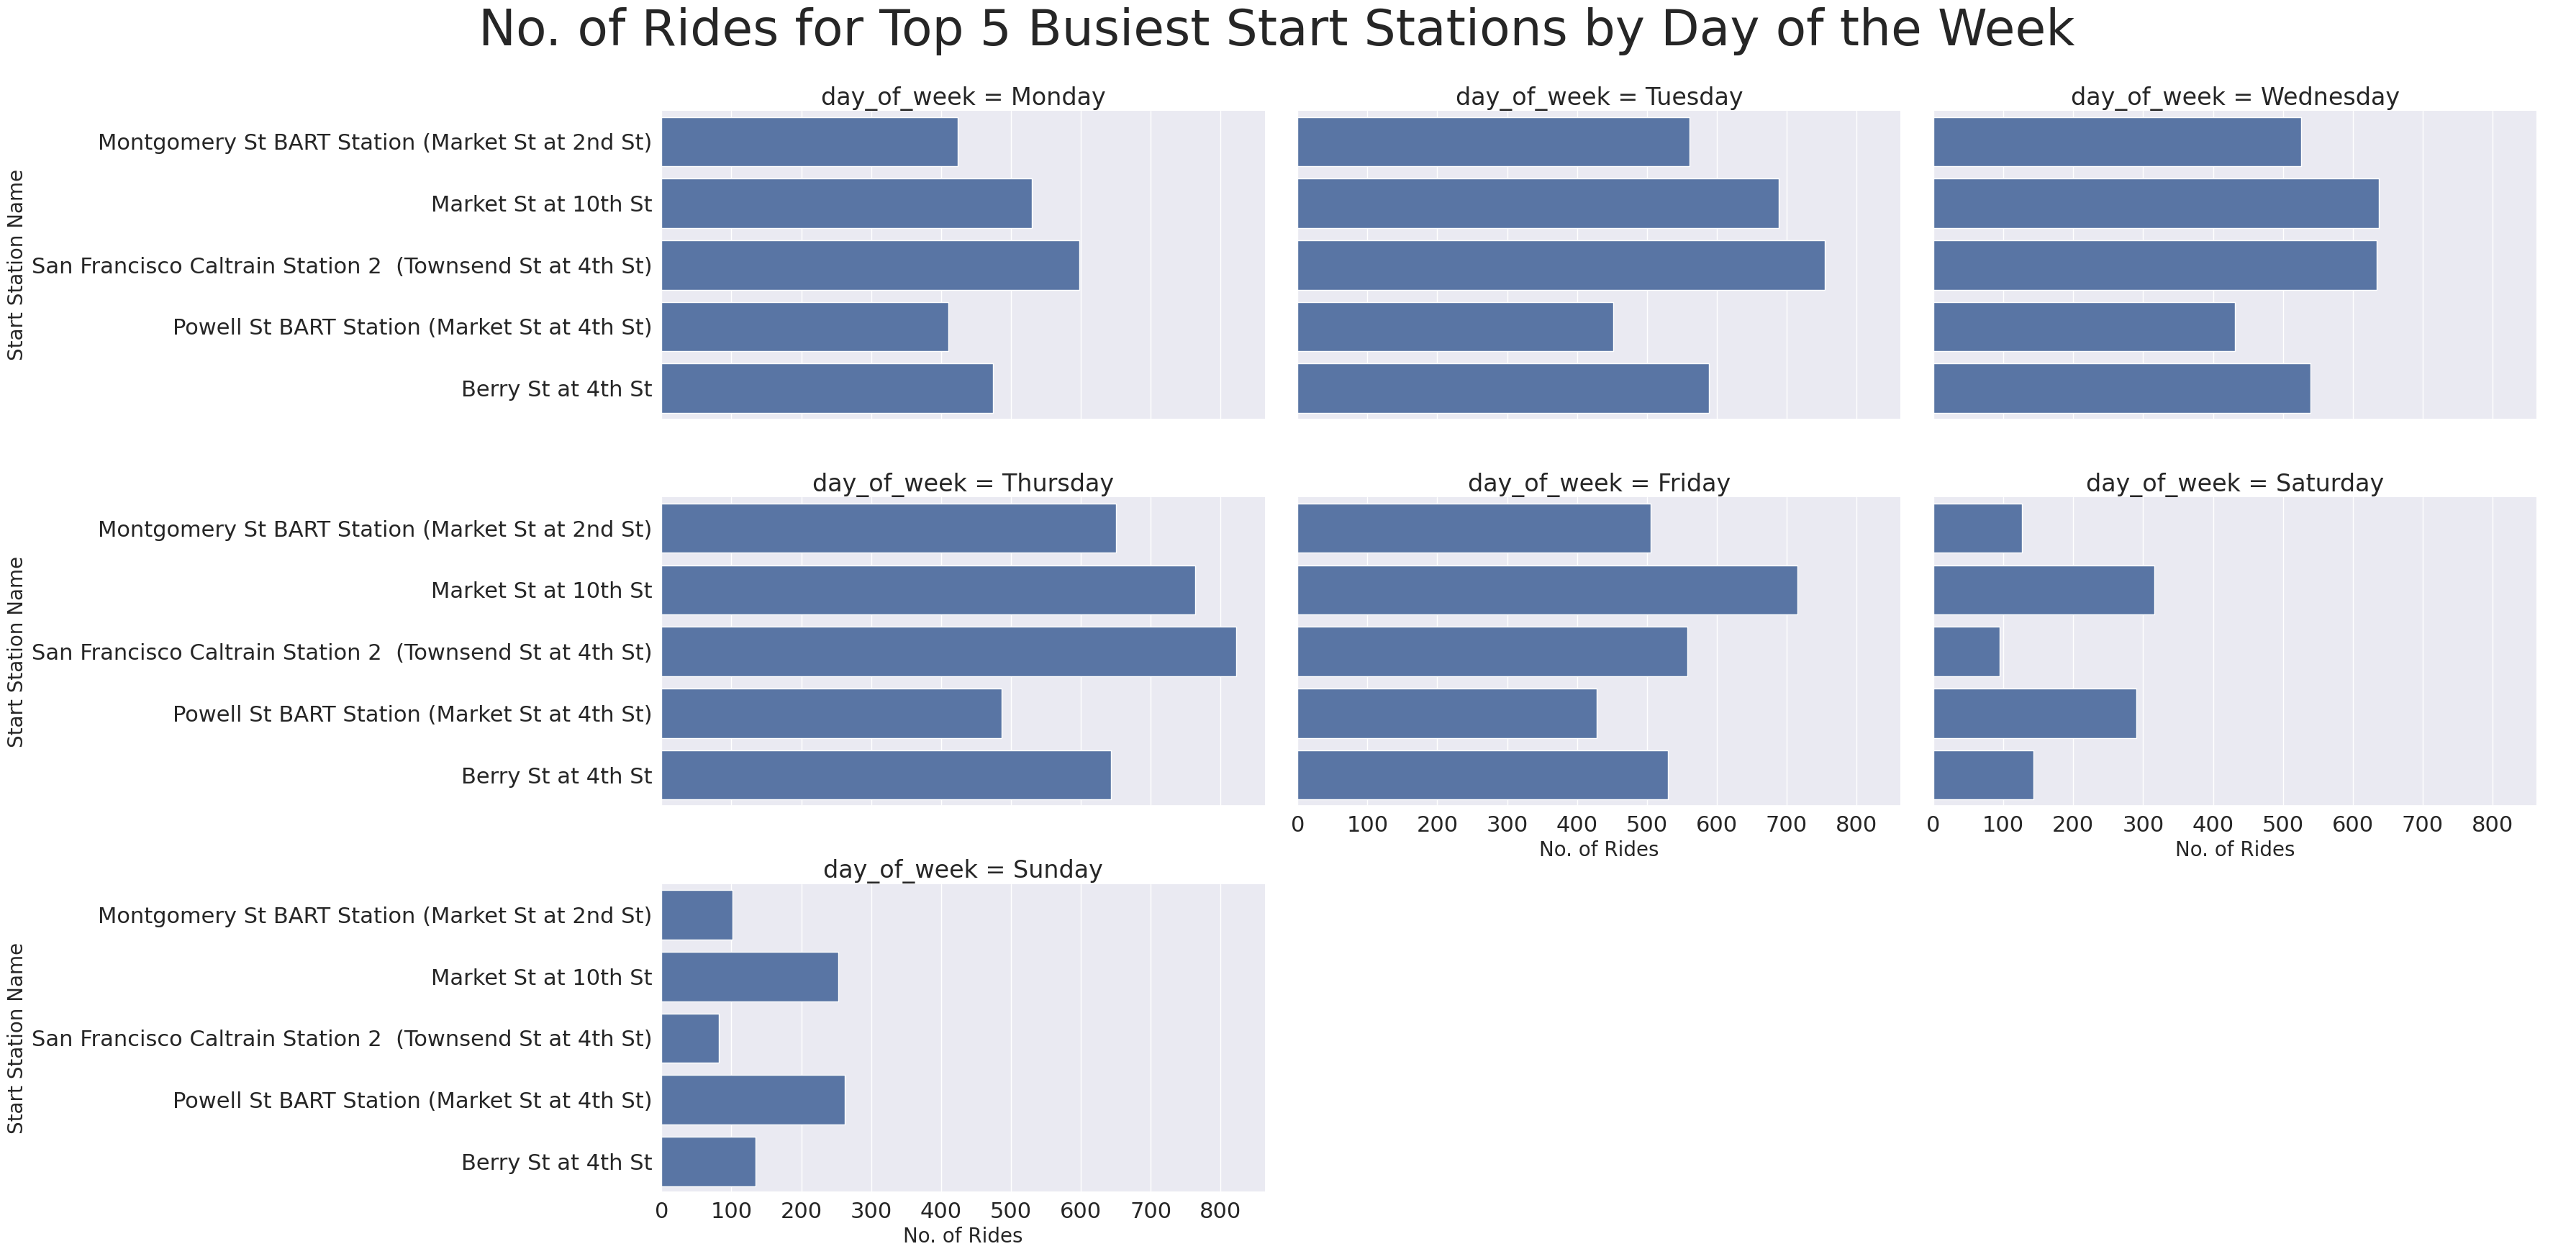

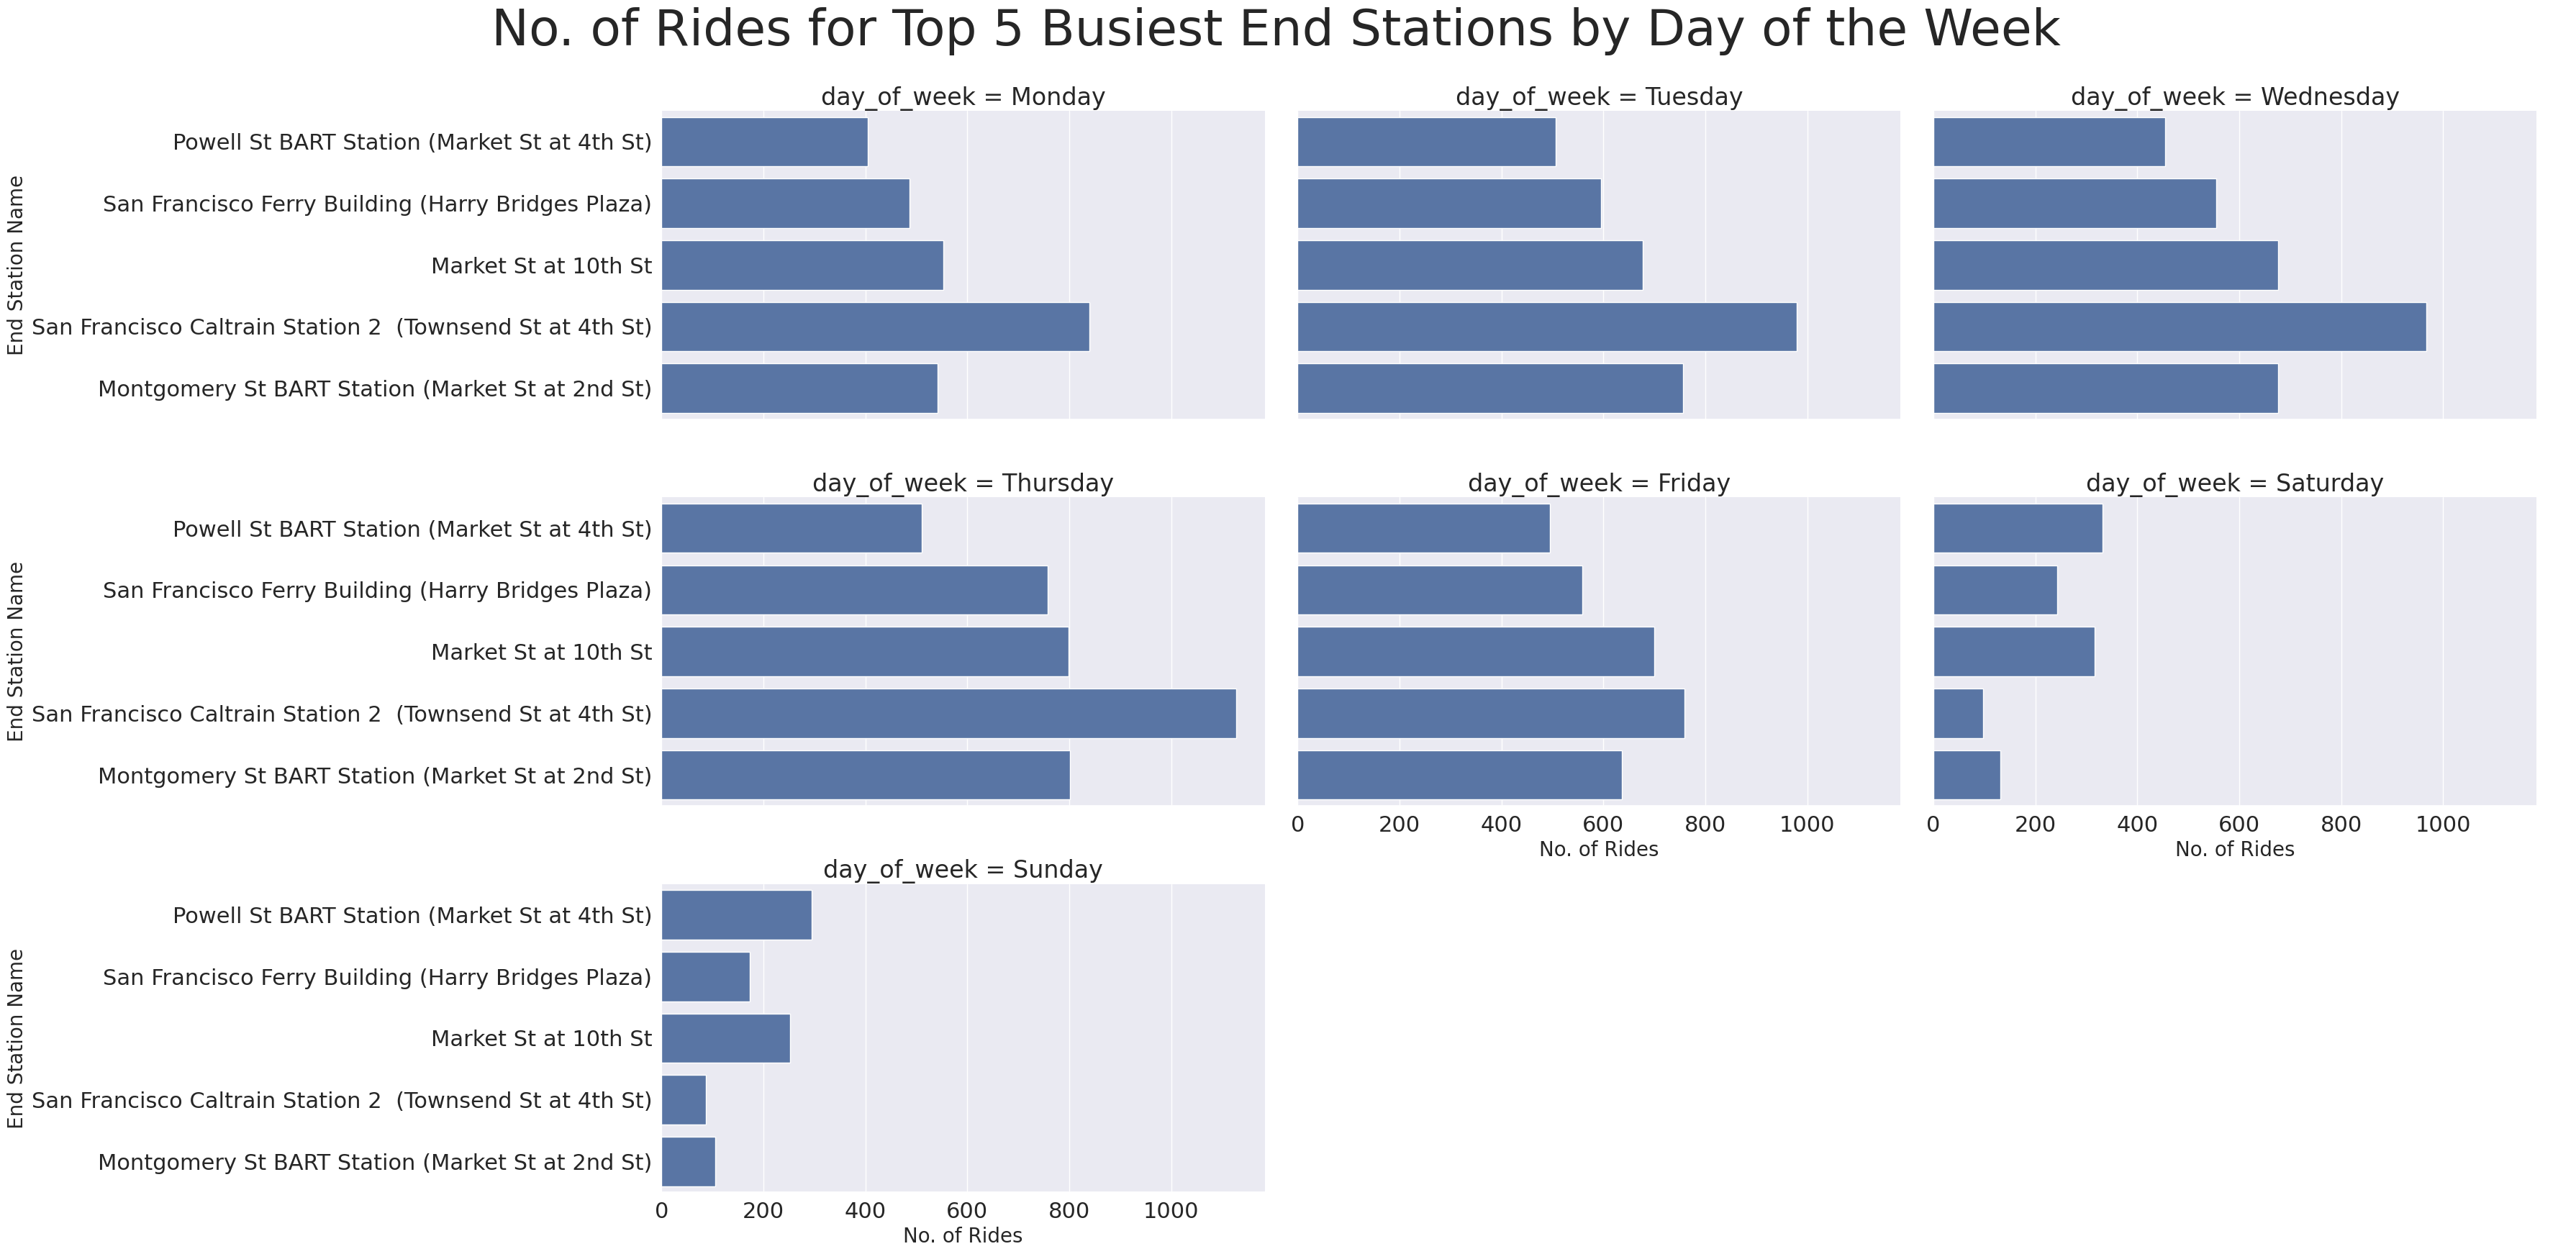

In [34]:
# Set plot size and style
sns.set(font_scale=2)  # Increase font size for better readability
sns.set_palette('deep')  # Choose a color palette for the plots

# Plot Matrix for Top 5 Busiest Start Stations by Day of the Week (Without Hourly Breakdown)
g_start = sns.catplot(data=df[df['start_station_name'].isin(top_5_start_stations)],  # Filter data to include only the top 5 start stations
                      y='start_station_name', col='day_of_week', kind='count',  # Count the rides per start station by day of the week
                      height=6, aspect=2, col_wrap=3, col_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # Define the plot layout and day order

# Customize the appearance of the start station plot
g_start.set_xlabels('No. of Rides', fontsize=20)  # Label for the x-axis
g_start.set_ylabels('Start Station Name', fontsize=20)  # Label for the y-axis
g_start.fig.subplots_adjust(top=0.9)  # Adjust layout for better title placement
g_start.fig.suptitle('No. of Rides for Top 5 Busiest Start Stations by Day of the Week', fontsize=50)  # Add title to the plot

# Plot Matrix for Top 5 Busiest End Stations by Day of the Week (Without Hourly Breakdown)
g_end = sns.catplot(data=df[df['end_station_name'].isin(top_5_end_stations)],  # Filter data to include only the top 5 end stations
                    y='end_station_name', col='day_of_week', kind='count',  # Count the rides per end station by day of the week
                    height=6, aspect=2, col_wrap=3, col_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # Define the plot layout and day order

# Customize the appearance of the end station plot
g_end.set_xlabels('No. of Rides', fontsize=20)  # Label for the x-axis
g_end.set_ylabels('End Station Name', fontsize=20)  # Label for the y-axis
g_end.fig.subplots_adjust(top=0.9)  # Adjust layout for better title placement
g_end.fig.suptitle('No. of Rides for Top 5 Busiest End Stations by Day of the Week', fontsize=50)  # Add title to the plot

# Show the plots
plt.show()

### Observation #4:
Weekdays: High bike usage at San Francisco Caltrain Station 2 and Montgomery St BART Station, indicating commuter traffic.<br><br>
Weekends: Increased activity at leisure spots like Market St at 10th St.<br><br>
Trend: Start stations show consistent use, while end stations vary more by day.

### Question #5 :What are the top 5 busiest Start/End stations by the hour of the Day?

### Visualization #5 - Plot Matrix

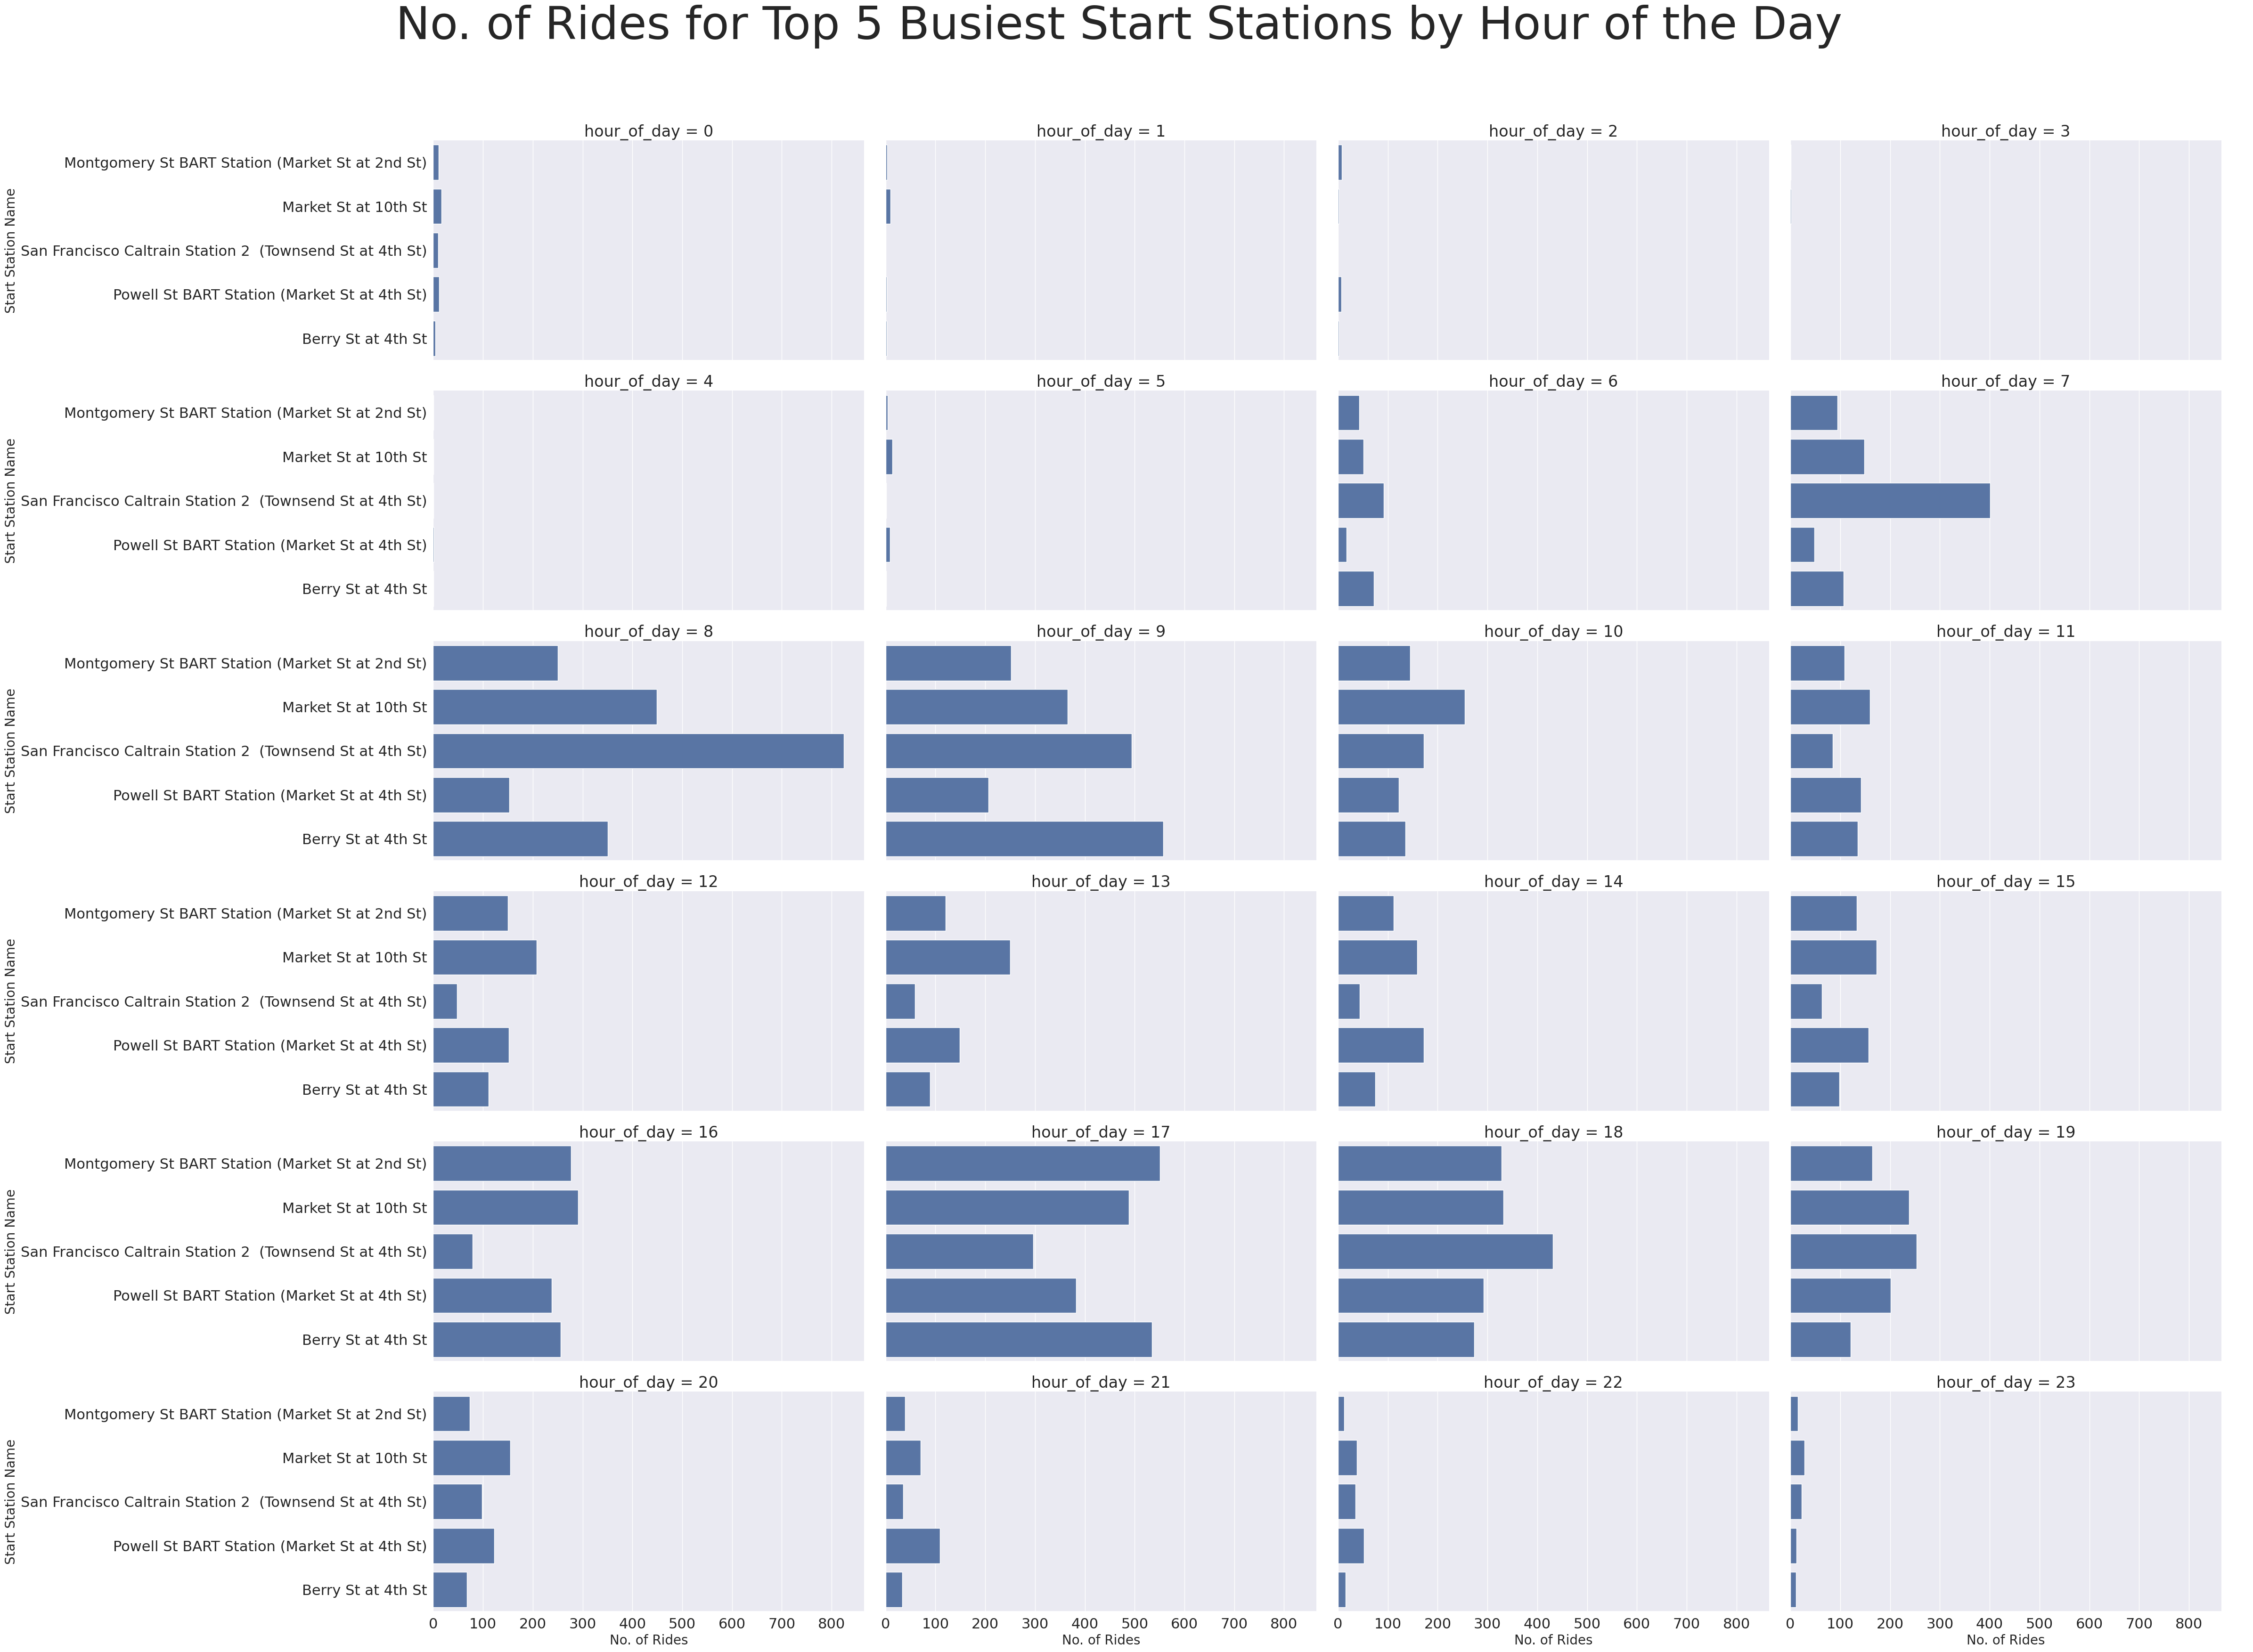

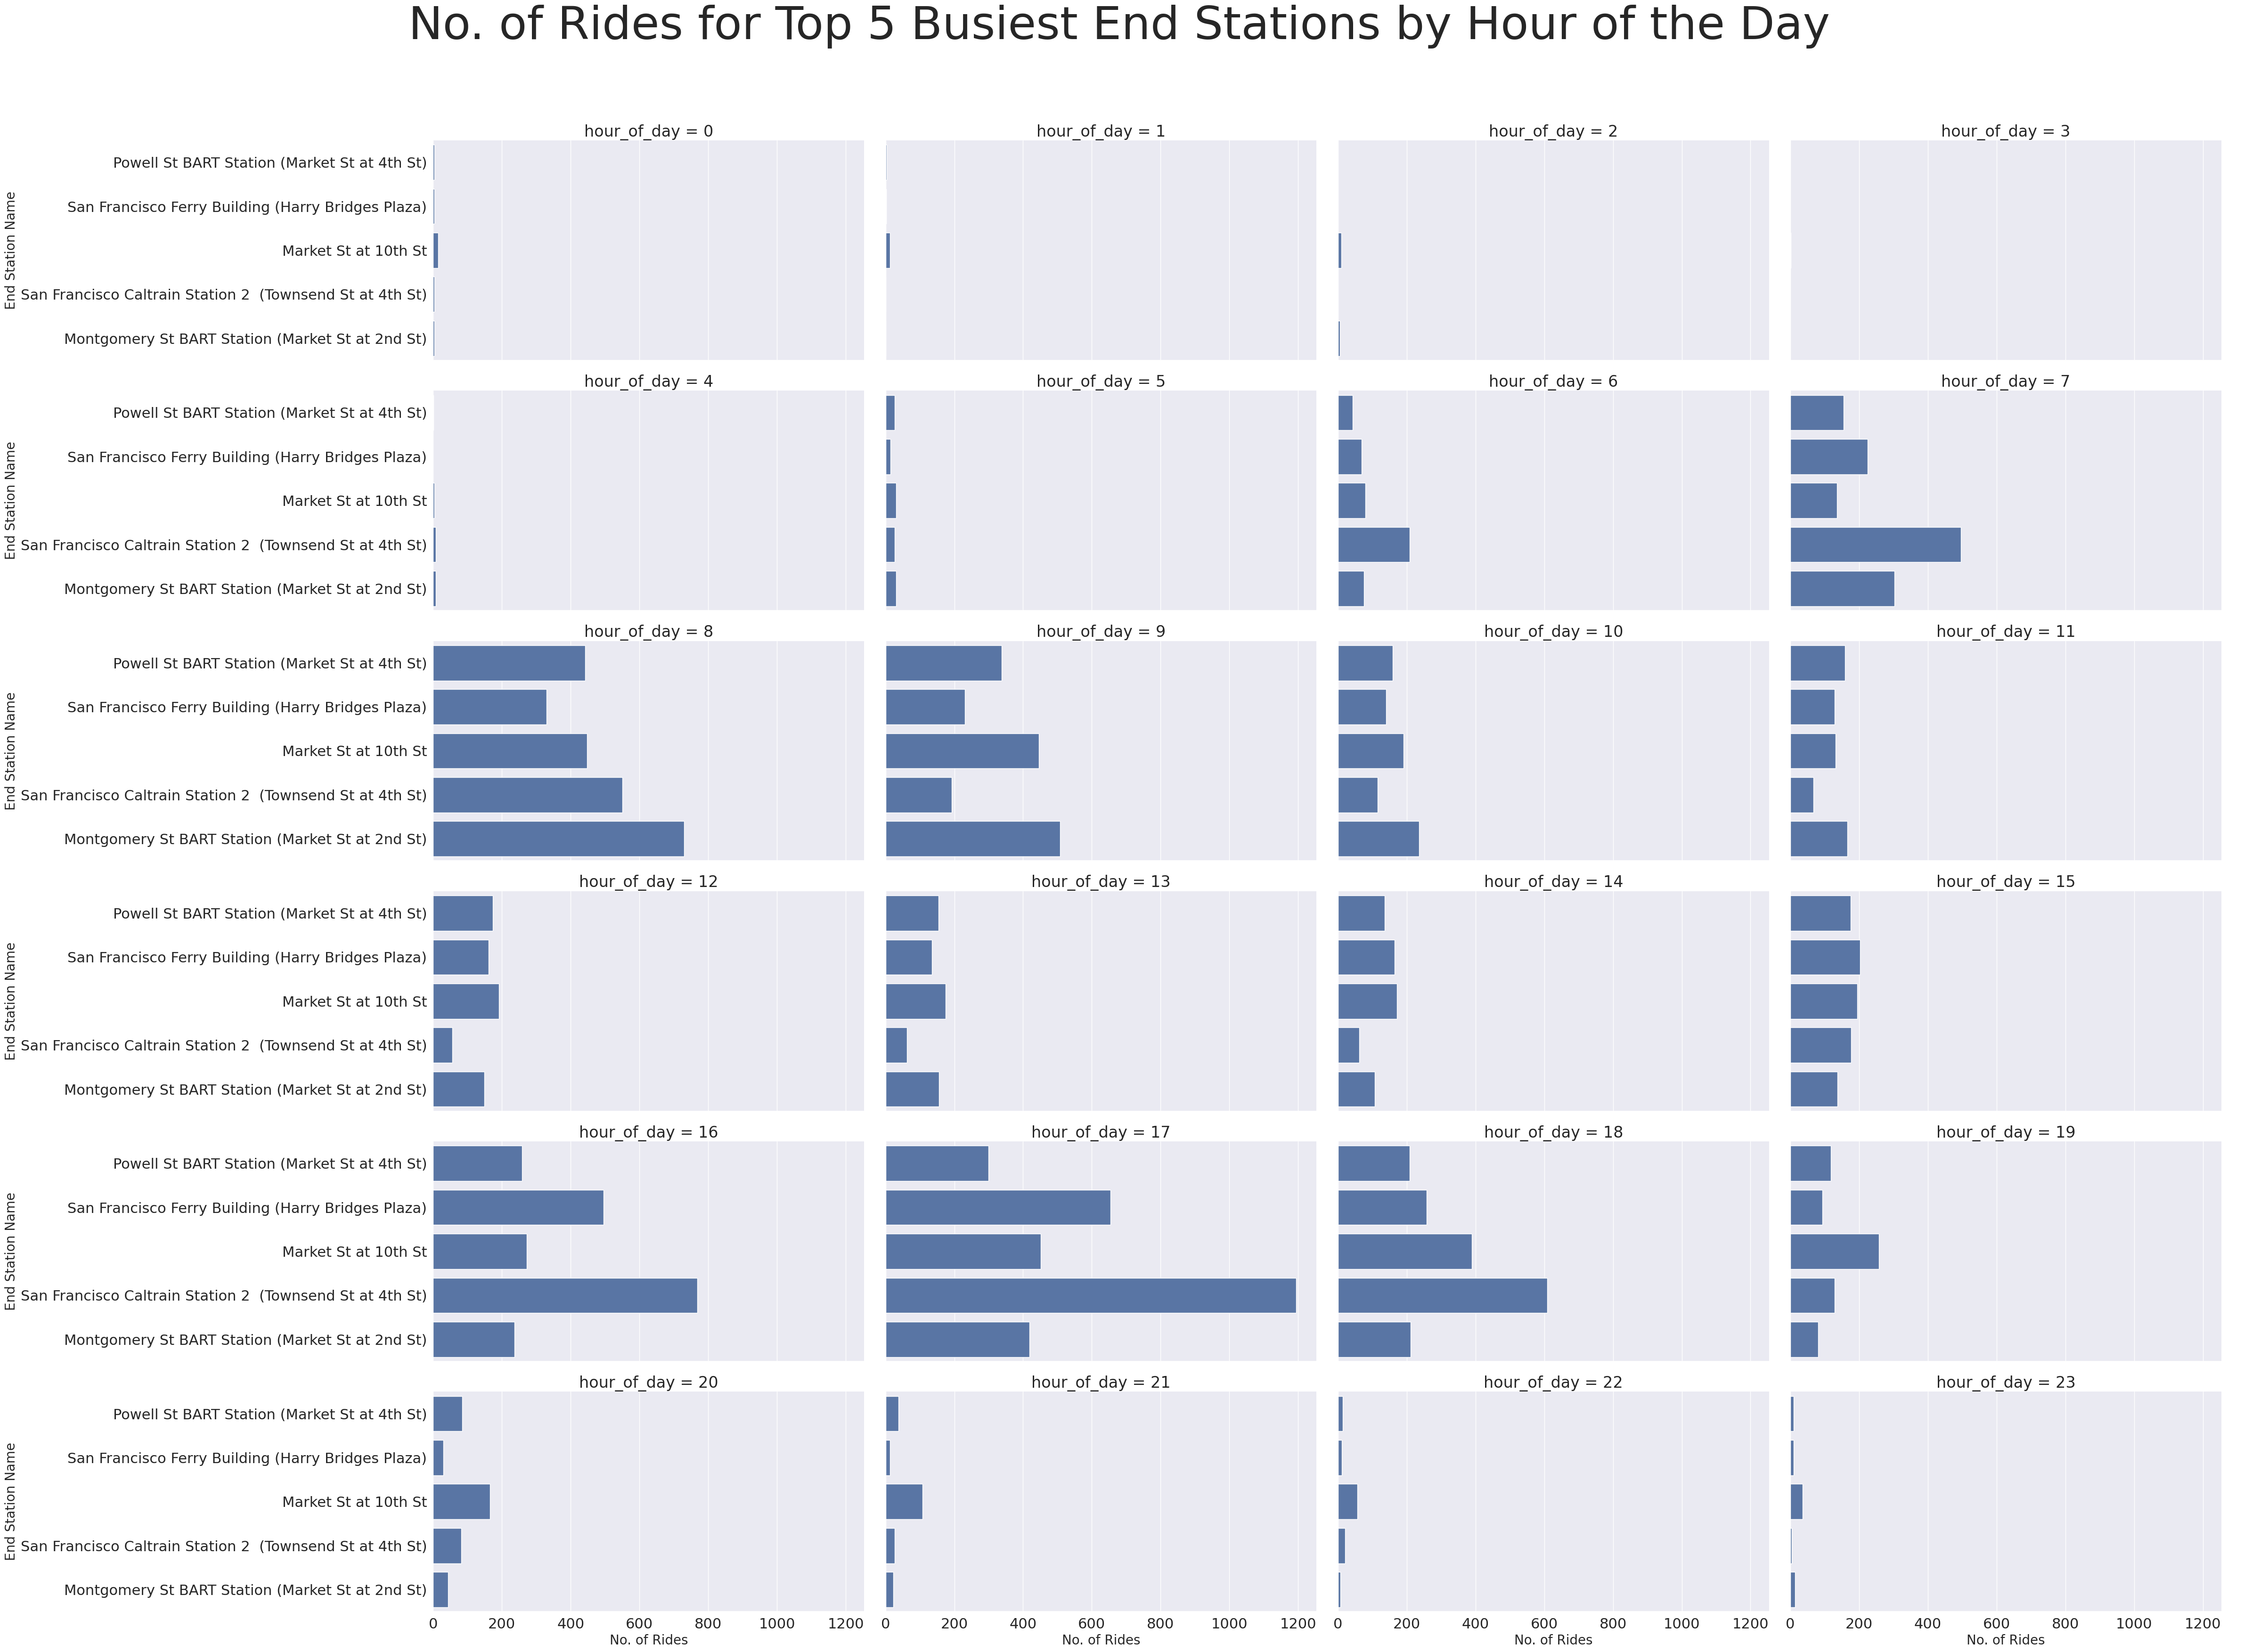

In [35]:
# Set plot size and style
sns.set(font_scale=2)  # Increase font size for better readability
sns.set_palette('deep')  # Choose a color palette for the plots

# Plot Matrix for Top 5 Busiest Start Stations by Hour (Grouped by Hour)
g_start_hour = sns.catplot(data=df[df['start_station_name'].isin(top_5_start_stations)],  # Filter data to include only the top 5 start stations
                           y='start_station_name', col='hour_of_day', kind='count',  # Count the rides per start station by hour of the day
                           height=6, aspect=2, col_wrap=4, col_order=range(0, 24))  # Define the plot layout for hours (0 to 23)

# Customize the appearance of the start station by hour plot
g_start_hour.set_xlabels('No. of Rides', fontsize=20)  # Label for the x-axis
g_start_hour.set_ylabels('Start Station Name', fontsize=20)  # Label for the y-axis
g_start_hour.fig.subplots_adjust(top=0.9)  # Adjust layout for better title placement
g_start_hour.fig.suptitle('No. of Rides for Top 5 Busiest Start Stations by Hour of the Day', fontsize=70)  # Add title to the plot

# Plot Matrix for Top 5 Busiest End Stations by Hour (Grouped by Hour)
g_end_hour = sns.catplot(data=df[df['end_station_name'].isin(top_5_end_stations)],  # Filter data to include only the top 5 end stations
                         y='end_station_name', col='hour_of_day', kind='count',  # Count the rides per end station by hour of the day
                         height=6, aspect=2, col_wrap=4, col_order=range(0, 24))  # Define the plot layout for hours (0 to 23)

# Customize the appearance of the end station by hour plot
g_end_hour.set_xlabels('No. of Rides', fontsize=20)  # Label for the x-axis
g_end_hour.set_ylabels('End Station Name', fontsize=20)  # Label for the y-axis
g_end_hour.fig.subplots_adjust(top=0.9)  # Adjust layout for better title placement
g_end_hour.fig.suptitle('No. of Rides for Top 5 Busiest End Stations by Hour of the Day', fontsize=70)  # Add title to the plot

# Show the plots
plt.show()


### Observation #5:
Morning (7-9 AM) – High start station activity (commute rush).<br><br>
Evening (4-7 PM) – High end station activity (return trips).<br><br>
Low (12-5 AM) – Minimal usage across stations.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>The investigation revealed that trip duration and distance have a positive correlation, with longer trips covering more distance. Subscribers take longer and more frequent trips compared to customers, and older users tend to take longer rides than younger users. The combination of user type and member age strengthened the understanding of ride behavior, showing that older subscribers prefer longer trips, while younger customers generally opt for shorter rides.

### Were there any interesting or surprising interactions between features?

> included older users taking longer trips, which suggests leisurely rides, and customers taking shorter trips, despite being less frequent users. The variation in younger users' trip distances also stood out, indicating that age alone doesn't fully determine ride behavior—trip purpose might be a key factor.


## Conclusions
>1-User Base: The majority of bike users are subscribers, who tend to use the bikes for commuting during weekdays. Normal customers also use bikes, but mainly on weekends for shorter trips. Subscribers dominate the system, with fewer rides observed on weekends.

>2-Trip Patterns: There is a clear trend of heavy bike usage during office peak hours on weekdays, as seen in the hourly distribution for both subscribers and customers. Rides are mostly within 50 minutes and 8 km, indicating that bike-sharing is used primarily for short trips, likely for commuting.

>3-Age and Gender: Age and gender do not have a significant impact on riding habits. Both male and female riders across all age groups seem to follow similar trip patterns, with no major differences in ride durations or distances.

>4-Duration and Distance: A positive linear relationship exists between trip duration and distance. This relationship strengthens when removing outliers, especially when considering shorter distance and duration ranges. This suggests that longer trips tend to cover more distance, with some outliers skewing the data.

>5-Station Usage: The busiest stations are San Francisco Caltrain Station 2 and Market St at 10th Street. San Francisco Caltrain Station 2 is the busiest start station during weekday mornings and end station during weekday afternoons, likely due to its proximity to residential areas. On the other hand, Market St at 10th Street remains busy throughout the day. Montgomery St BART Station, located near office areas, is also one of the top 5 busiest stations.

>>These insights help to better understand how age, user type, and location influence bike-sharing behavior, as well as the relationship between trip duration and distance, which is critical for optimizing bike-sharing services.
